## Preparação do ambiente

In [113]:
pip install pandas seaborn matplotlib scikit-learn numpy


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from sklearn.linear_model import LinearRegression


In [115]:
df = pd.read_csv('diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


## Análise dos dados

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               572 non-null    int64  
 1   Glucose                   567 non-null    float64
 2   BloodPressure             537 non-null    float64
 3   SkinThickness             345 non-null    float64
 4   Insulin                   198 non-null    float64
 5   BMI                       561 non-null    float64
 6   DiabetesPedigreeFunction  572 non-null    float64
 7   Age                       572 non-null    int64  
 8   Outcome                   572 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 40.3 KB


In [117]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,572.000000,567.000000,537.000000,345.000000,198.000000,561.000000,572.000000,572.000000,572.000000
mean,4.106643,121.647266,73.150838,29.356522,156.934343,32.327629,0.459121,34.043706,0.358392
std,3.446995,30.132084,12.347184,10.433503,119.066934,6.735437,0.336124,12.103893,0.479948
min,0.000000,44.000000,30.000000,7.000000,16.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,65.000000,22.000000,77.500000,27.500000,0.236000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,129.500000,32.000000,0.344500,30.000000,0.000000
75%,6.000000,140.000000,80.000000,36.000000,185.000000,36.600000,0.605500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,57.300000,2.329000,81.000000,1.000000


In [118]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

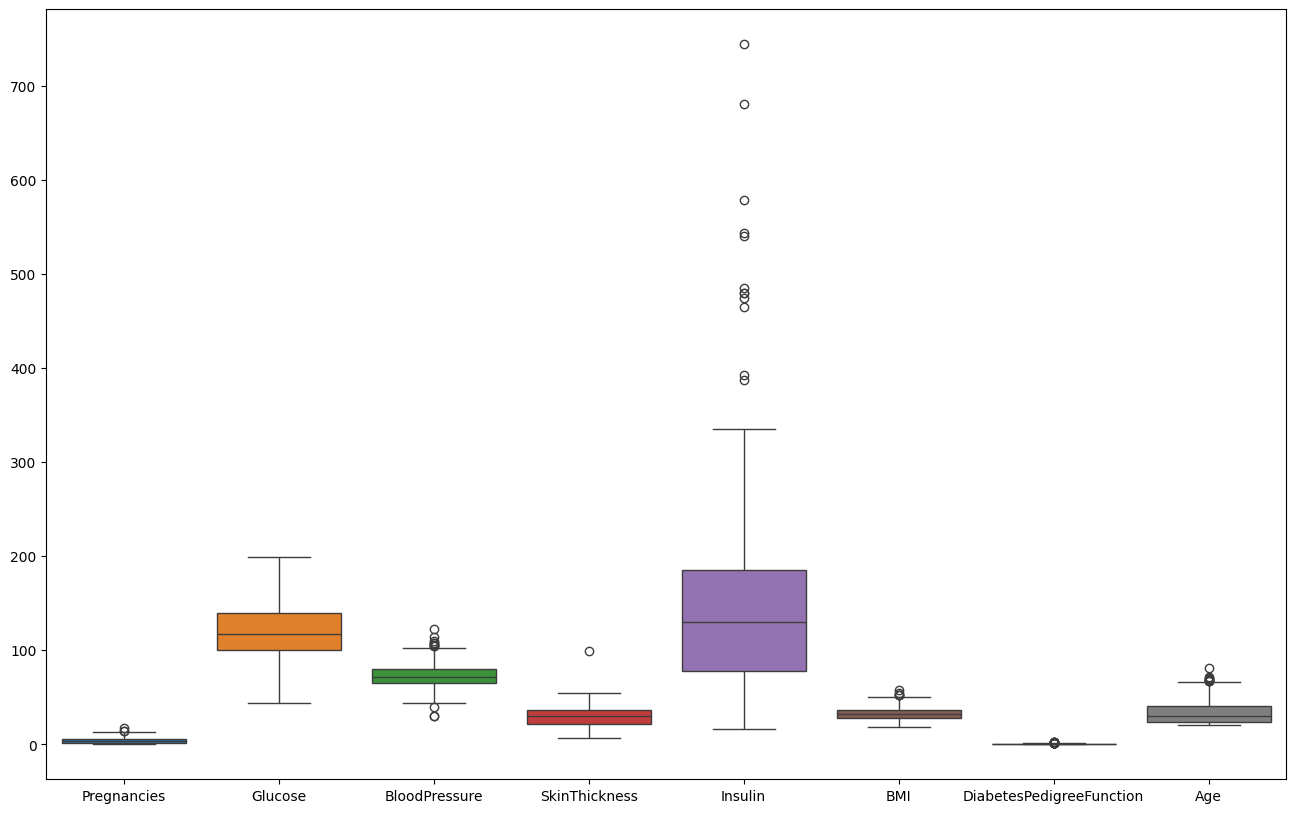

In [119]:
plt.figure(figsize= (16,10))
sns.boxplot(data= df.drop(columns=['Outcome']))
plt.savefig('boxplot.png')
plt.show()

## Pré-processamento

### Remoção de Outliers para Correlação

In [120]:
df_no_outliers = df.copy()
df_no_outliers = df_no_outliers[df_no_outliers['BloodPressure'] < 120]
df_no_outliers = df_no_outliers[df_no_outliers['BloodPressure'] > 40]

df_no_outliers = df_no_outliers[df_no_outliers['SkinThickness'] < 45]
df_no_outliers = df_no_outliers[df_no_outliers['SkinThickness'] > 15]
df_no_outliers = df_no_outliers[df_no_outliers['Insulin'] < 320]
df_no_outliers = df_no_outliers[df_no_outliers['Glucose'] < 200]

df_no_outliers = df_no_outliers[df_no_outliers['BMI'] < 50]



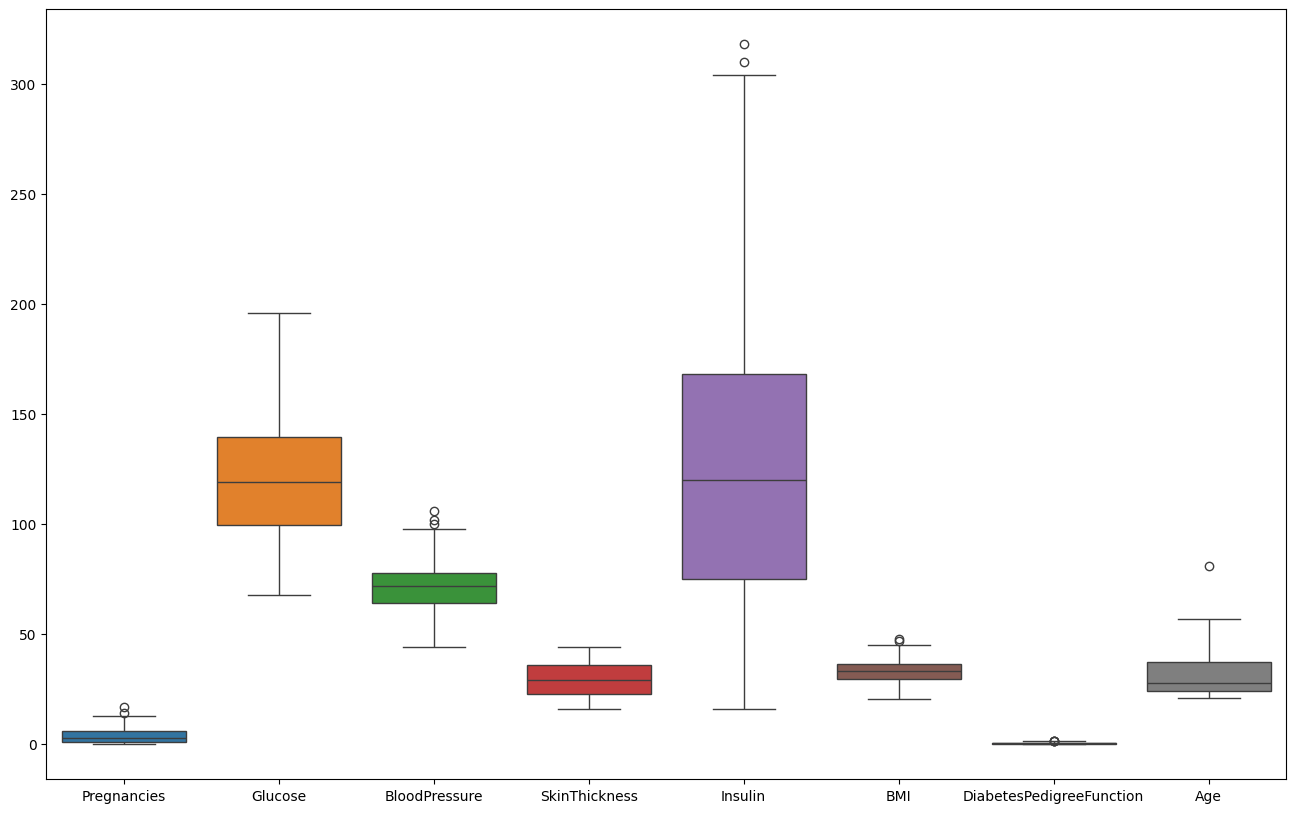

In [121]:
plt.figure(figsize= (16,10))
sns.boxplot(data= df_no_outliers.drop(columns=['Outcome']))
plt.savefig('boxplot.png')
plt.show()

In [122]:
qtd_sick = df_no_outliers[df_no_outliers['Outcome'] == 1].shape[0]
qtd_healthy = df_no_outliers[df_no_outliers['Outcome'] == 0].shape[0]

print(f"Number of sick patients: {qtd_sick}")
print(f"Number of healthy patients: {qtd_healthy}")

Number of sick patients: 45
Number of healthy patients: 98


In [123]:
df_no_outliers.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [124]:
df_no_outliers.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,3.797203,121.335664,71.251748,29.335664,129.398601,33.062937,0.500084,31.237762,0.314685
std,3.587065,28.714217,11.410687,7.847978,66.929450,5.501699,0.317053,10.090407,0.466023
min,0.000000,68.000000,44.000000,16.000000,16.000000,20.400000,0.085000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,23.000000,75.000000,29.650000,0.260000,24.000000,0.000000
50%,3.000000,119.000000,72.000000,29.000000,120.000000,33.200000,0.423000,28.000000,0.000000
75%,6.000000,139.500000,78.000000,36.000000,168.000000,36.300000,0.685000,37.500000,1.000000
max,17.000000,196.000000,106.000000,44.000000,318.000000,47.900000,1.699000,81.000000,1.000000


In [125]:
df_no_outliers.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126948,0.208579,0.170792,0.008494,-0.046238,0.020561,0.715588,0.164827
Glucose,0.126948,1.000000,0.115138,0.130092,0.604131,0.099229,0.103385,0.199053,0.517267
BloodPressure,0.208579,0.115138,1.000000,0.179056,0.011560,0.227397,-0.052304,0.309880,0.104186
SkinThickness,0.170792,0.130092,0.179056,1.000000,0.129444,0.543972,-0.016625,0.139227,0.192349
Insulin,0.008494,0.604131,0.011560,0.129444,1.000000,0.249380,0.132493,0.007898,0.344556
BMI,-0.046238,0.099229,0.227397,0.543972,0.249380,1.000000,0.042631,-0.031592,0.158944
DiabetesPedigreeFunction,0.020561,0.103385,-0.052304,-0.016625,0.132493,0.042631,1.000000,0.060515,0.243564
Age,0.715588,0.199053,0.309880,0.139227,0.007898,-0.031592,0.060515,1.000000,0.181660
Outcome,0.164827,0.517267,0.104186,0.192349,0.344556,0.158944,0.243564,0.181660,1.000000


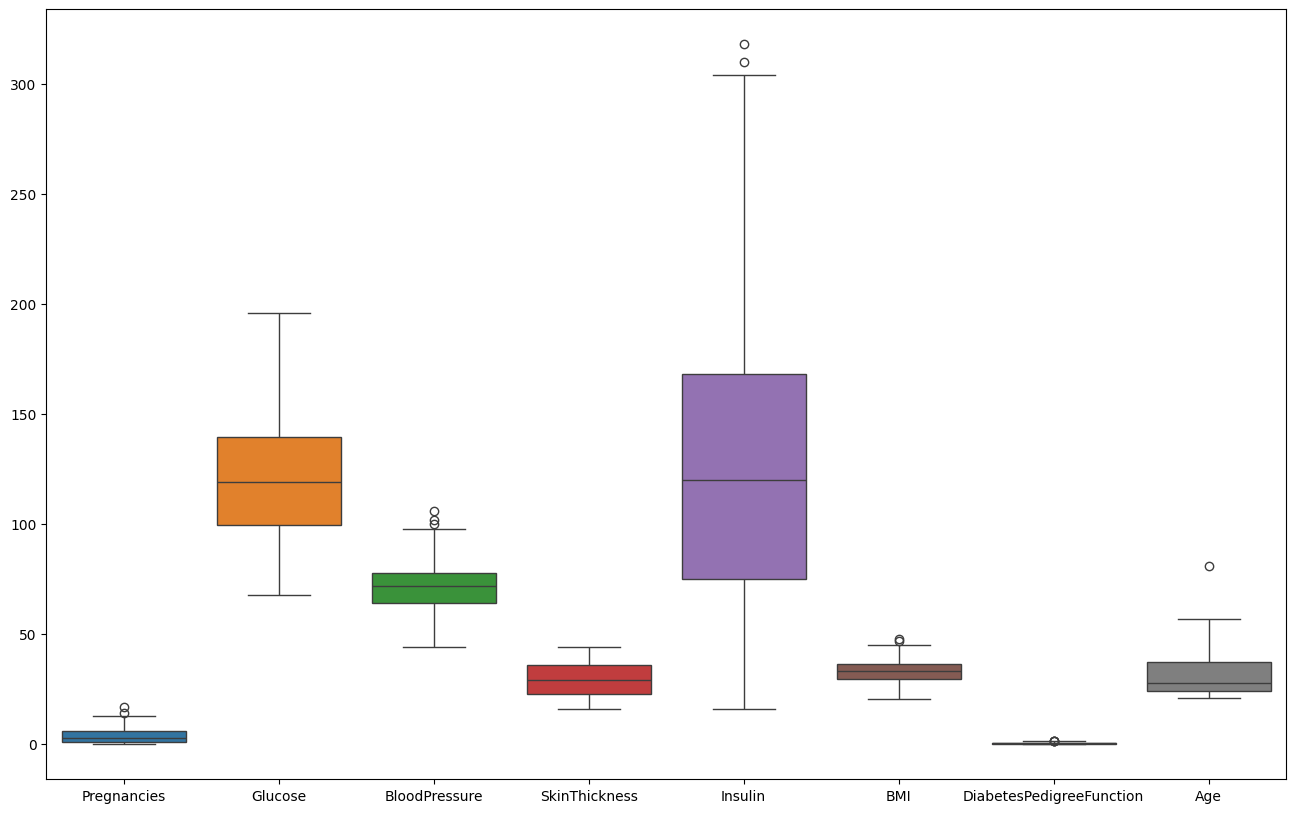

In [126]:
plt.figure(figsize= (16,10))
sns.boxplot(data= df_no_outliers.drop(columns=['Outcome']))
plt.savefig('boxplot.png')
plt.show()

### Remoção de colunas não utilizadas

In [127]:
df.pop('Pregnancies')
df.pop('Age')

0      50
1      31
2      32
3      33
4      30
       ..
567    33
568    27
569    30
570    47
571    23
Name: Age, Length: 572, dtype: int64

### Limpeza dos outliers das colunas selecionadas

In [128]:
df.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Outcome                       0
dtype: int64

### Preenchimento da coluna Glucose

In [129]:
mean_glucose_sick = df_no_outliers[df_no_outliers['Outcome'] == 1]['Glucose'].mean()
mean_glucose_healthy = df_no_outliers[df_no_outliers['Outcome'] == 0]['Glucose'].mean()

print(f"mean glucose level for sick patients: {mean_glucose_sick}")
print(f"mean glucose level for healthy patients: {mean_glucose_healthy}")

# Replace missing values with the mean glucose level for the corresponding outcome
df.loc[(df['Outcome'] == 1) & (df['Glucose'].isnull()), 'Glucose'] = mean_glucose_sick
df.loc[(df['Outcome'] == 0) & (df['Glucose'].isnull()), 'Glucose'] = mean_glucose_healthy

mean glucose level for sick patients: 143.17777777777778
mean glucose level for healthy patients: 111.3061224489796


### Preenchimento da coluna Insulin

In [130]:

# mean_insulin_sick = df[df['Outcome'] == 1]['Insulin'].mean()
# mean_insulin_healthy = df[df['Outcome'] == 0]['Insulin'].mean()
# df.loc[(df['Outcome'] == 1) & (df['Insulin'].isnull()), 'Insulin'] = mean_insulin_sick

#Drop null values from column Insulin
df = df.dropna(subset=['Insulin'])


# print(f"Mean insulin level for sick patients: {mean_insulin_sick}")
# print(f"Mean insulin level for healthy patients: {mean_insulin_healthy}")

## Replace missing values with the mean insulin level for the corresponding outcome
# df.loc[(df['Outcome'] == 1) & (df['Insulin'].isnull()), 'Insulin'] = mean_insulin_sick
# df.loc[(df['Outcome'] == 0) & (df['Insulin'].isnull()), 'Insulin'] = mean_insulin_healthy

# df.head()

### Preenchimento da coluna SkinThickness

In [131]:
mean_skin_thickness_sick = df_no_outliers[df_no_outliers['Outcome'] == 1]['SkinThickness'].mean()
mean_skin_thickness_healthy = df_no_outliers[df_no_outliers['Outcome'] == 0]['SkinThickness'].mean()

print(f"mean skin thickness for sick patients: {mean_skin_thickness_sick}")
print(f"mean skin thickness for healthy patients: {mean_skin_thickness_healthy}")

# Replace missing values with the mean skin thickness for the corresponding outcome
df.loc[(df['Outcome'] == 1) & (df['SkinThickness'].isnull()), 'SkinThickness'] = mean_skin_thickness_sick
df.loc[(df['Outcome'] == 0) & (df['SkinThickness'].isnull()), 'SkinThickness'] = mean_skin_thickness_healthy

mean skin thickness for sick patients: 31.555555555555557
mean skin thickness for healthy patients: 28.316326530612244


### Preenchimento da coluna BloodPressure

In [132]:
mean_blodd_pressure_sick = df_no_outliers[df_no_outliers['Outcome'] == 1]['BloodPressure'].mean()
mean_blodd_pressure_healthy = df_no_outliers[df_no_outliers['Outcome'] == 0]['BloodPressure'].mean()

print(f"Mean blood pressure for sick patients: {mean_blodd_pressure_sick}")
print(f"Mean blood pressure for healthy patients: {mean_blodd_pressure_healthy}")

# # Replace missing values with the mean blood pressure for the corresponding outcome
df.loc[(df['Outcome'] == 1) & (df['BloodPressure'].isnull()), 'BloodPressure'] = mean_blodd_pressure_sick
df.loc[(df['Outcome'] == 0) & (df['BloodPressure'].isnull()), 'BloodPressure'] = mean_blodd_pressure_healthy

Mean blood pressure for sick patients: 73.0
Mean blood pressure for healthy patients: 70.44897959183673


### Preenchimento da coluna BMI

In [133]:
mean_bmi = df_no_outliers['BMI'].mean()

print(f"Mean BMI: {mean_bmi}")

# Replace missing values with the mean BMI
df['BMI'].fillna(mean_bmi, inplace=True)

Mean BMI: 33.06293706293706


/tmp/ipykernel_23411/1766224215.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(mean_bmi, inplace=True)


In [134]:
qtd_sick = df[df['Outcome'] == 1].shape[0]
qtd_healthy = df[df['Outcome'] == 0].shape[0]

print(f"Number of sick patients: {qtd_sick}")
print(f"Number of healthy patients: {qtd_healthy}")

Number of sick patients: 67
Number of healthy patients: 131


In [135]:
df = df[df['BloodPressure'] < 120]
df = df[df['BloodPressure'] > 40]

df = df[df['SkinThickness'] < 45]
df = df[df['SkinThickness'] > 15]
df = df[df['Insulin'] < 320]
df = df[df['Glucose'] < 200]

df = df[df['BMI'] < 50]

## Resultado das etapas de pré-processamento

In [136]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64

In [137]:
qtd_sick = df[df['Outcome'] == 1].shape[0]
qtd_healthy = df[df['Outcome'] == 0].shape[0]

print(f"Number of sick patients: {qtd_sick}")
print(f"Number of healthy patients: {qtd_healthy}")

Number of sick patients: 67
Number of healthy patients: 131


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 3 to 569
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   198 non-null    float64
 1   BloodPressure             198 non-null    float64
 2   SkinThickness             198 non-null    float64
 3   Insulin                   198 non-null    float64
 4   BMI                       198 non-null    float64
 5   DiabetesPedigreeFunction  198 non-null    float64
 6   Outcome                   198 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 12.4 KB


## Normalização

In [139]:
df_normalized = df.copy() 
  
# apply normalization techniques 
for column in df_normalized.columns: 
    df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / (df_normalized[column].max() - df_normalized[column].min())     
  
df_normalized.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
3,0.534884,0.131579,0.622222,0.208791,0.626316,0.981729,1.0
6,1.000000,0.526316,0.844444,0.723901,0.294737,0.032531,1.0
12,0.387597,0.710526,0.888889,0.293956,0.697368,0.207665,1.0
14,0.271318,0.000000,0.688889,0.092033,0.631579,0.043672,0.0
15,0.449612,0.763158,0.755556,0.300824,0.526316,0.275847,0.0


Arredondamento

Criando o dataset pré-processado

In [140]:
df_normalized.to_csv('diabetes_dataset_pre_processed.csv', index=False)